# Hypergraph information

In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")

In [2]:
results_dir = "../results/"
out_dir  = f"{results_dir}synthetic/"

In [3]:
def plot_3panels(info_losses, complexities, orders, labels, legend_title=None):
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 2.1), constrained_layout=True, sharey=True)

    n = len(info_losses)
    
    for i in range(n):
        ax1.plot(orders[i], info_losses[i], "o-", label=labels[i], ms=7, mfc="w", lw=2)      

    ax1.set_title("Information Loss (KL)")
    ax1.set_xlabel("Max Order")
    ax1.set_ylabel("Bits")
    
    for i in range(n):
        ax2.plot(orders[i], complexities[i], "o-", label=labels[i], ms=7, mfc="w", lw=2)      

    ax2.set_title("Model Complexity ($\delta S$)")
    ax2.set_xlabel("Max Order")
    
    for i in range(n):
        message_length = complexities[i] + info_losses[i]
        ax3.plot(orders[i], message_length, "o-", label=labels[i], ms=7, mfc="w", lw=2)

    ax3.legend(title=legend_title, bbox_to_anchor=(1, 0.5), frameon=False, loc="center left")

    ax3.set_title("Message Length")
    ax3.set_xlabel("Max Order")

    sb.despine()

    #fig.suptitle(f"Complete hypergraph N={N}")

    #fig_name = f"message_length_complete_hypergraph_N{N}" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

    #plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
    
    return fig, (ax1, ax2, ax3)

# Random Simplicial Complex up to order 4

In [29]:
N = 100
ps = 5 * np.array([1/N, 1/N**2, 1/N**3, 1/N**4])

H0 = xgi.random_simplicial_complex(N, ps=ps)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

In [30]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=False)
tau_c

0.013468749501337644

In [34]:
Ds_H = np.zeros((1000,4,4))
lZs_H = np.zeros((1000,4,4))

for rep in range(1000): 
    if (rep+1)%100==0:
        print(rep+1)
    for i, p in enumerate(np.linspace(0,0.9,4)):
        if p != 0:
            H = shuffle_hyperedges(S=H0, order=1, p=p)
            H = shuffle_hyperedges(S=H, order=2, p=p)
            H = shuffle_hyperedges(S=H, order=3, p=p)
            H = shuffle_hyperedges(S=H, order=4, p=p)
        else:
            H = xgi.Hypergraph(H0.edges.members(dtype=dict))
        Ds_H[rep,i], lZs_H[rep,i], _ = compute_information(H, tau_c, rescale_per_node=False)

100
200
300
400
500
600
700
800
900
1000


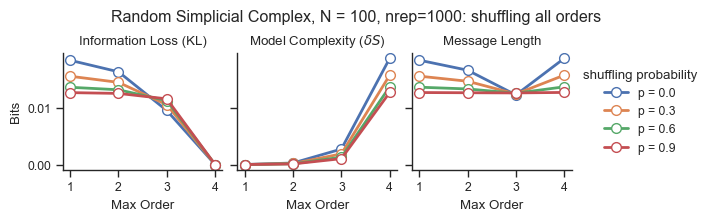

In [36]:
plot_3panels(np.mean(Ds_H, axis=0), np.mean(lZs_H, axis=0), [orders, orders, orders, orders], 
             ["p = 0.0", "p = 0.3", "p = 0.6", "p = 0.9"], legend_title="shuffling probability")
plt.suptitle("Random Simplicial Complex, N = 100, nrep=1000: shuffling all orders")

fig_name = f"message_length_random_simplicial_complex_N_100_p_0_03_06_09"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")